# Project: Investigate Movie Dataset

## Table of Contents
<ol>
    <li><a href="#intro">Introduction</a></li>    
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#beda">Basic Exploratory Data Analysis</a></li>
    <li><a href="#ieda">Intermediate Exploratory Data Analysis</a></li>
    <li><a href="#aeda">Advanced Exploratory Data Analysis</a></li>
    <li><a href="#conclusion">Conclusion</a></li>
</ol>

<a id='intro'></a>
## 1. Introduction

The selected dataset for Research is the IMDB Movie Dataset. A movie goes through various phases of production and deals with lot of characteristics such as Directors, Producers, Casts, Cost and many more things and that is the sole reason I have chosen this data set.

The questions that have been answered in this analysis are as follows:

<ol>
    <li> Basic Exploratory Questions
        <ol>
            <li>Movie releases on a yearly basis</li>
            <li>Highest Budget Movie</li>
            <li>Lowest Budget Movie</li>
            <li>Highest Revenue Movie</li>
            <li>Lowest Revenue Movie</li>
            <li>Best All Rounder Movie</li>
            <li>Poorly Performed Movie</li>
            <li>Highly Voted Movie</li>
            <li>Lowly Voted Movie</li>
            <li>Most Popular Movie</li>            
        </ol>
    </li>
    <li> Intermediate Exploratory Questions
        <ol>
            <li>Cast Frequency Trend</li>
            <li>Cast Frequency Trend In Profit Making Movies</li>
            <li>Cast Frequency Trend In Loss Making Movies</li>
            <li>Keyword Frequency Trend</li>
            <li>Woman Director who made Highest Grossing</li>
            <li>Keyword Frequency Trend In Profit Making Movies</li>
            <li>Keyword Frequency Trend In Loss Making Movies</li>
            <li>Genre Frequency Trend</li>
            <li>Genre Frequency Trend In Profit Making Movies</li>
            <li>Genre Frequency Trend In Loss Making Movies</li>
            <li>Distribution of Voting Score</li>
            <li>Distribution of Runtime</li>
            <li>Distribution of Runtime in Profit Making Movies</li>
            <li>Distribution of Budget</li>
            <li>Distribution of Revenue</li>
        </ol>
    </li>
    <li> Advanced Exploratory Questions
        <ol>
            <li>Popularism of Casts in 4 quarters of years</li>
            <li>Popularism of Casts in 4 quarters of years but in Profitable Movies</li>
            <li>Distribution of Casts in 4 quarters of years but in Loss making Movies</li>
            <li>Distribution of Genre in 4 quarters of years</li>
            <li>Genre Trend over the Years</li>
            <li>Genre Trend over the Years of Profitable movies</li>
        </ol>
    </li>
</ol>

In [1495]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## 2. Data Wrangling

### 2.1 General Properties
In this section, the dataset will be read and cleaned if required so that it gets ready for Analysis purpose

In [1496]:
movie_df = pd.read_csv('tmdb-movies.csv')

<a id='intro'></a>
### 2.1.1 Shape

There are 10866 movies in the dataset and there are 21 characteristics of each movie.

In [1497]:
movie_df.shape

(10866, 21)

<a id='intro'></a>
### 2.1.2 Info

The dataset has multiple NULL values

In [1498]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

<a id='intro'></a>
### 2.1.3  Window

Small view of the dataset that we will be working on

In [1499]:
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### 2.1.4 Description of the Columns and values
<ul>
    <li>id - Movie ID</li>
    <li>imdb_id - IMDB's Movie ID</li>
    <li>Popularity - It is the Percentage value of how many people liked it</li>
    <li>budget - Budget of the Movie in dollars</li>
    <li>revenue - Revenue of the movie made until now</li>
    <li>original_title - Movie title</li>
    <li>cast - Actors of the movie</li>
    <li>homepage - Website link of the movie</li>
    <li>director - Direction Role</li>
    <li>tagline - Tag Line of the movie</li>
    <li>keywords - Key words</li>
    <li>overview - Overview</li>
    <li>runtime - Runtime in minutes</li>
    <li>genres - Genres like Action, Comedy etc.</li>
    <li>production_companies - Companies who invested the movie</li>
    <li>release_date - Date of release</li>
    <li>vote_count - Count of people who voted for it</li>
    <li>vote_average - Rating of the movie</li>
    <li>release_year - Year of release</li>
    <li>budget_adj - Adjusted budget as of 2010</li>
    <li>revenue_adj - Adjested revenue as of 2010</li>
</ul>

In [1500]:
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### 2.1.5 Data Cleaning
The dataset needs to be cleaned in order to make good use of the data present in the dataset.
Multiple rows and/or columns would be deleted if they would be found invalid.

The following columns I wish to remove as I am not-interested in analyzing over those values and more-over they do not add to any value other than just knowing them:
<ul>
    <li>id</li>
    <li>imdb_id</li>
    <li>homepage</li>
    <li>tagline</li>
    <li>release_date</li>
    <li>overview</li>
    <li>budget_adj</li>
    <li>revenue_adj</li>
</ul>

In [1501]:
movie_df.drop(columns=['imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

After dropping the above mentioned columns, the number of columns are now reduced to 15

In [1502]:
movie_df.shape

(10866, 15)

In [1503]:
movie_df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


Let's see if the NULL values present in the rows are required or not.

There are plenty of movie details such as Director, Cast, Genres & production_companies that are not present, let's drop them to further strengthen the data present.

In [1504]:
movie_df[movie_df.cast.isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 371 to 10754
Data columns (total 15 columns):
id                      76 non-null int64
popularity              76 non-null float64
budget                  76 non-null int64
revenue                 76 non-null int64
original_title          76 non-null object
cast                    0 non-null object
director                70 non-null object
keywords                45 non-null object
runtime                 76 non-null int64
genres                  75 non-null object
production_companies    36 non-null object
release_date            76 non-null object
vote_count              76 non-null int64
vote_average            76 non-null float64
release_year            76 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 9.5+ KB


In [1505]:
movie_df[movie_df.director.isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 532 to 10426
Data columns (total 15 columns):
id                      44 non-null int64
popularity              44 non-null float64
budget                  44 non-null int64
revenue                 44 non-null int64
original_title          44 non-null object
cast                    38 non-null object
director                0 non-null object
keywords                16 non-null object
runtime                 44 non-null int64
genres                  42 non-null object
production_companies    21 non-null object
release_date            44 non-null object
vote_count              44 non-null int64
vote_average            44 non-null float64
release_year            44 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 5.5+ KB


In [1506]:
movie_df[movie_df.genres.isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 424 to 10659
Data columns (total 15 columns):
id                      23 non-null int64
popularity              23 non-null float64
budget                  23 non-null int64
revenue                 23 non-null int64
original_title          23 non-null object
cast                    22 non-null object
director                21 non-null object
keywords                5 non-null object
runtime                 23 non-null int64
genres                  0 non-null object
production_companies    9 non-null object
release_date            23 non-null object
vote_count              23 non-null int64
vote_average            23 non-null float64
release_year            23 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 2.9+ KB


In [1507]:
movie_df.dropna(subset = ['cast', 'director', 'genres'], inplace=True)
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 15 columns):
id                      10732 non-null int64
popularity              10732 non-null float64
budget                  10732 non-null int64
revenue                 10732 non-null int64
original_title          10732 non-null object
cast                    10732 non-null object
director                10732 non-null object
keywords                9307 non-null object
runtime                 10732 non-null int64
genres                  10732 non-null object
production_companies    9773 non-null object
release_date            10732 non-null object
vote_count              10732 non-null int64
vote_average            10732 non-null float64
release_year            10732 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.3+ MB


It is required to remove duplicates too, it is found that there is only one duplicate present

In [1508]:
movie_df.drop_duplicates(inplace=True)
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
id                      10731 non-null int64
popularity              10731 non-null float64
budget                  10731 non-null int64
revenue                 10731 non-null int64
original_title          10731 non-null object
cast                    10731 non-null object
director                10731 non-null object
keywords                9306 non-null object
runtime                 10731 non-null int64
genres                  10731 non-null object
production_companies    9772 non-null object
release_date            10731 non-null object
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.3+ MB


Not possible that someone can make a movie with 0 budget, it is highly possible that the data has not been captured properly or that the budget is really 0, but the probability of a movie getting released without any expense is not possible, hence  marking them as NaN would be the best option.

In [1509]:
movie_df.query('budget==0').head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
30,280996,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,london|detective|sherlock holmes,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015


A movie with Revenue as 0, cannot have a max popularity of 8.4 and Max vote average of 9.2, hence it is certain that the data wasn't collected properly, hence marking it as NaN would be a good option to choose

In [1510]:
movie_df.query('revenue==0')[['popularity', 'vote_average']].describe()

,popularity,vote_average
count,5888.000000,5888.000000
mean,0.328788,5.813077
std,0.304551,1.001149
min,0.000188,1.500000
25%,0.150058,5.200000
50%,0.265119,5.900000
75%,0.421024,6.500000
max,8.411577,9.200000


A Movie with Runtime as 0 cannot have Max Budget of 6,000,000 USD and cannot have a vote count of max 80, hence it is certain that the data was not collected properly, hence marking it as NaN would be better

In [1511]:
movie_df.query('runtime==0')[['budget', 'revenue', 'popularity', 'production_companies', 'vote_count']].describe()

,budget,revenue,popularity,vote_count
count,2.800000e+01,28.0,28.000000,28.000000
mean,4.017857e+05,0.0,0.192495,20.964286
std,1.305862e+06,0.0,0.350403,16.012685
min,0.000000e+00,0.0,0.006440,10.000000
25%,0.000000e+00,0.0,0.037320,11.750000
50%,0.000000e+00,0.0,0.096019,14.500000
75%,0.000000e+00,0.0,0.178342,24.500000
max,6.000000e+06,0.0,1.876037,80.000000


In [1512]:
movie_df['budget'].replace(0, np.NaN, inplace=True)
movie_df['revenue'].replace(0, np.NaN, inplace=True)
movie_df['runtime'].replace(0, np.NaN, inplace=True)
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
id                      10731 non-null int64
popularity              10731 non-null float64
budget                  5153 non-null float64
revenue                 4843 non-null float64
original_title          10731 non-null object
cast                    10731 non-null object
director                10731 non-null object
keywords                9306 non-null object
runtime                 10703 non-null float64
genres                  10731 non-null object
production_companies    9772 non-null object
release_date            10731 non-null object
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
dtypes: float64(5), int64(3), object(7)
memory usage: 1.3+ MB


<a id='beda'></a>
## 3. Basic Exploratory Data Analysis

In this section we will be analyzing the basic things like Best Movie, Worst Movie, Best performed movie, Worst performed movie and many more things.

In [1513]:
def highest(column):
    index = movie_df[column].idxmax
    info = pd.DataFrame(movie_df.loc[index])
    return info

In [1514]:
def lowest(column):
    index = movie_df[column].idxmin
    info = pd.DataFrame(movie_df.loc[index])
    return info

### Research Question 1: Movie releases on a yearly basis
Very clear that the movie releases increases every year

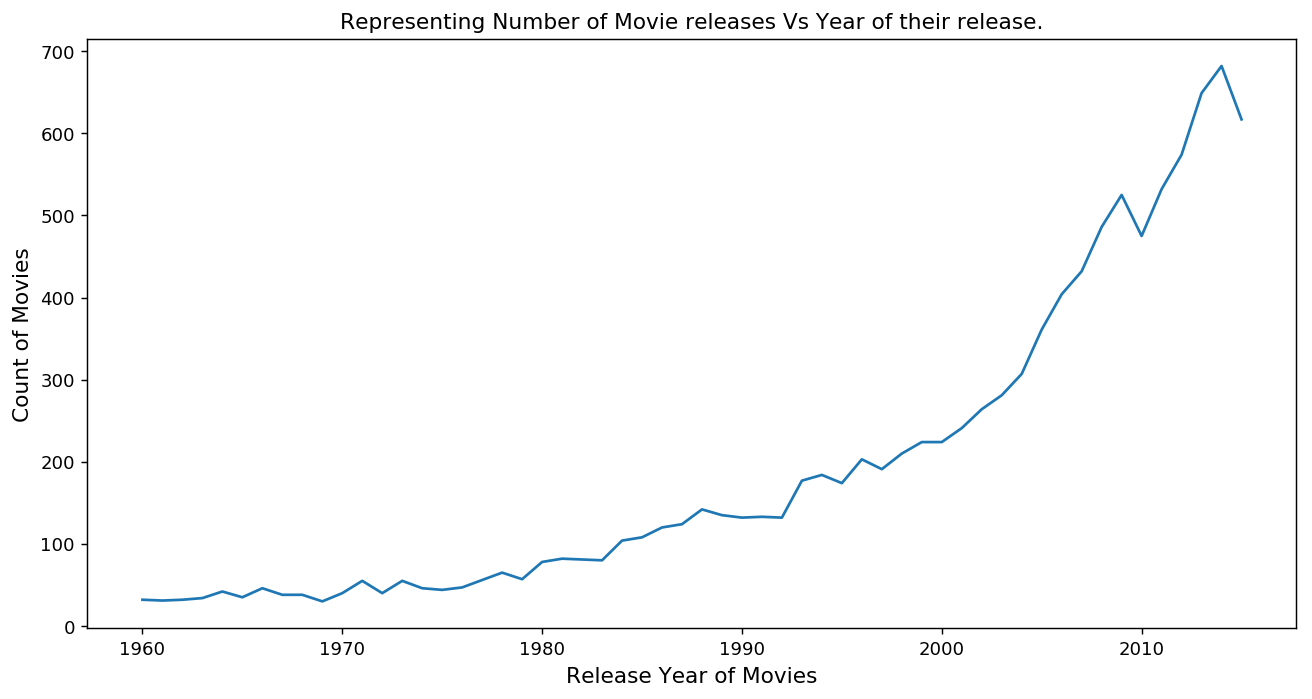

In [1515]:
stats = movie_df.groupby('release_year')['id'].count()

plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Release Year of Movies', fontsize = 12)
plt.ylabel('Count of Movies', fontsize = 12)
plt.title('Representing Number of Movie releases Vs Year of their release.')

plt.plot(stats);

As per the above plot, it is understood the movie releases have increased over a period of time.
Approximately 50 movies were released in 1960, while in 2015 close to 650 movies were released, the plot is skewed towards the right, the number of movies that were released from 1960 - 1995 were growing marginally, but after 1995 there is a steep increase in the number of movie releases

### Research Question 2:  Highest Budget Movie

In [1516]:
highest('budget').loc[['original_title', 'director', 'cast', 'budget']]

,2244
original_title,The Warrior's Way
director,Sngmoo Lee
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
budget,4.25e+08


### Research Question 3:  Lowest Budget Movie

In [1517]:
lowest('budget').loc[['original_title', 'director', 'cast', 'budget']]

,1151
original_title,Fear Clinic
director,Robert Hall
cast,Thomas Dekker|Robert Englund|Cleopatra Coleman...
budget,1


### Research Question 4:  Highest Revenue Movie

In [1518]:
highest('revenue').loc[['original_title', 'director', 'cast', 'revenue']]

,1386
original_title,Avatar
director,James Cameron
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
revenue,2.78151e+09


### Research Question 5:  Lowest Revenue Movie

In [1519]:
lowest('revenue').loc[['original_title', 'director', 'cast', 'revenue']]

,5067
original_title,Shattered Glass
director,Billy Ray
cast,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
revenue,2


### Research Question 6:  Best All Rounder Movie

Adding a new column that would contain the profit value

In [1520]:
movie_df['profit'] = movie_df['revenue'] - movie_df['budget']

In [1521]:
highest('profit').loc[['original_title', 'director', 'cast', 'profit']]

,1386
original_title,Avatar
director,James Cameron
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
profit,2.54451e+09


### Research Question 7:  Poorly Performed Movie

In [1522]:
movie_df['loss'] = movie_df['budget'] - movie_df['revenue']

In [1523]:
highest('loss').loc[['original_title', 'director', 'cast', 'loss']]

,2244
original_title,The Warrior's Way
director,Sngmoo Lee
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
loss,4.13912e+08


### Research Question 8:  Highly Voted Movie

In [1524]:
highest('vote_average').loc[['original_title', 'director', 'cast']]

,3894
original_title,The Story of Film: An Odyssey
director,Mark Cousins
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...


### Research Question 9:  Lowly Voted Movie

In [1525]:
lowest('vote_average').loc[['original_title', 'director', 'cast']]

,7772
original_title,Transmorphers
director,Leigh Scott
cast,Matthew Wolf|Amy Weber|Shaley Scott|Eliza Swen...


### Research Question 10:  Most Popular Movie

In [1526]:
highest('popularity').loc[['original_title', 'director', 'cast', 'production_companies', 'budget', 'revenue']]

,0
original_title,Jurassic World
director,Colin Trevorrow
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
production_companies,Universal Studios|Amblin Entertainment|Legenda...
budget,1.5e+08
revenue,1.51353e+09


### Research Question 11:  Distribution of Voting Score

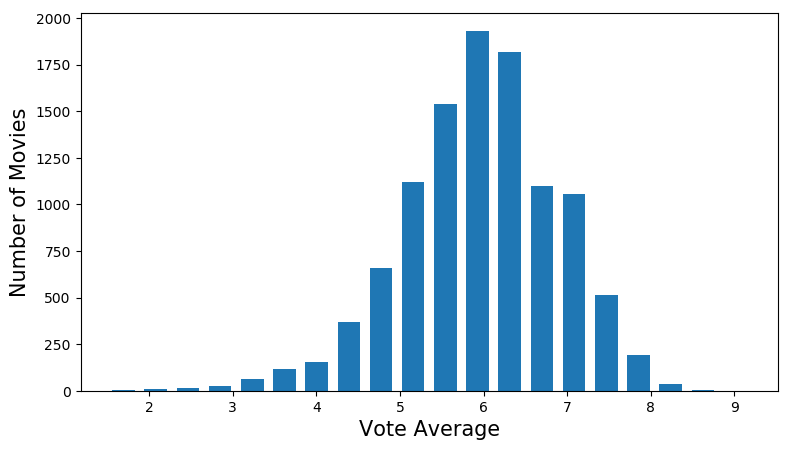

In [1527]:
plt.figure(figsize=(9,5), dpi= 100)
plt.hist(movie_df.vote_average, rwidth= 0.7, bins= 20);
plt.xlabel('Vote Average', fontsize = 15)
plt.ylabel('Number of Movies', fontsize=15)
plt.show()

Most of the movies got **6 rating** close to **2000 movies**

### Research Question 12:  Distribution of Runtime

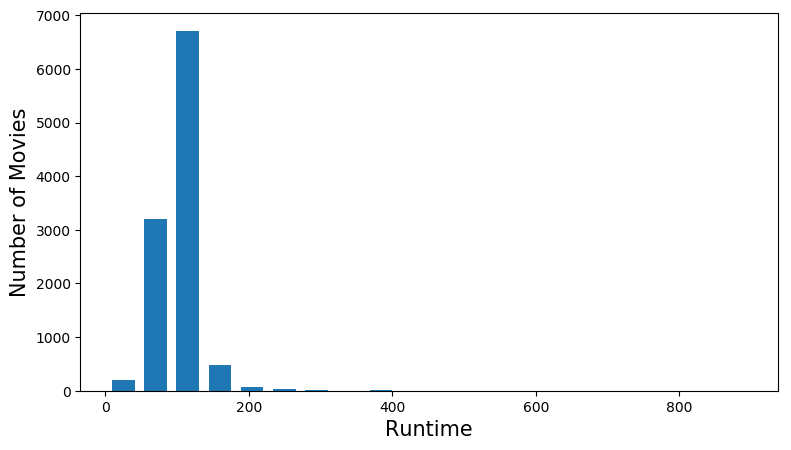

In [1528]:
plt.figure(figsize=(9,5), dpi = 100)
plt.hist(movie_df.runtime.dropna(), rwidth= 0.7, bins= 20);
plt.xlabel('Runtime', fontsize = 15)
plt.ylabel('Number of Movies', fontsize=15)
plt.show()

Many of the movies are made with Runtime close to **100 minutes** with close to **6750 movies**

### Research Question 12:  Distribution of Runtime in Profit Making Movies

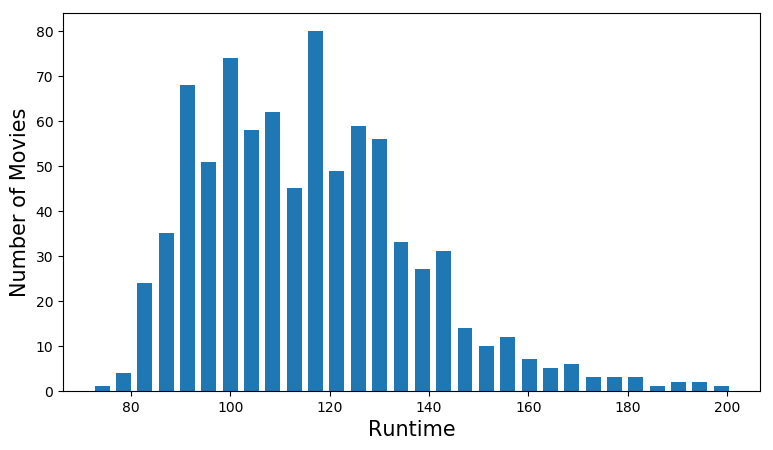

In [1529]:
plt.figure(figsize=(9,5), dpi = 100)
plt.hist(movie_df.query('profit > 100000000').runtime.dropna(), rwidth= 0.7, bins= 30);
plt.xlabel('Runtime', fontsize = 15)
plt.ylabel('Number of Movies', fontsize=15)
plt.show()

The Profit Making movies had a Runtime **from 95 to 130 minutes**

### Research Question 13:  Distribution of Budget

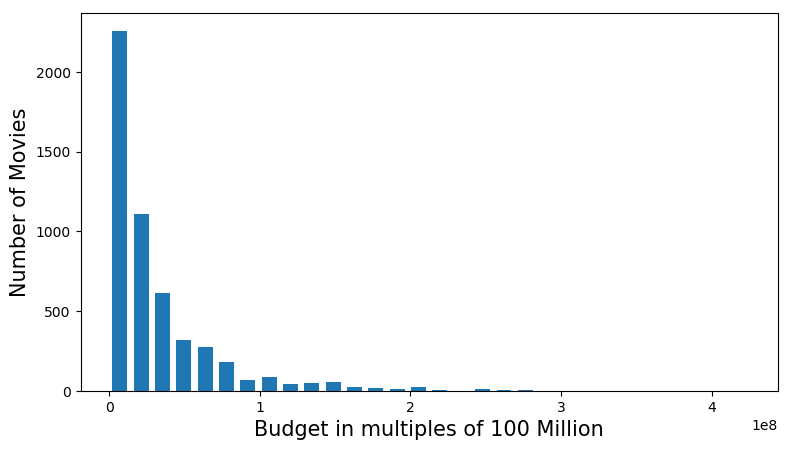

In [1530]:
plt.figure(figsize=(9,5), dpi = 100)
plt.hist(movie_df.budget.dropna(), rwidth= 0.7, bins= 30);
plt.xlabel('Budget in multiples of 100 Million', fontsize = 15)
plt.ylabel('Number of Movies', fontsize=15)
plt.show()

Most of the movies had a Budget somewhere **between 1 Million to 100 Million**

### Research Question 14:  Distribution of Revenue

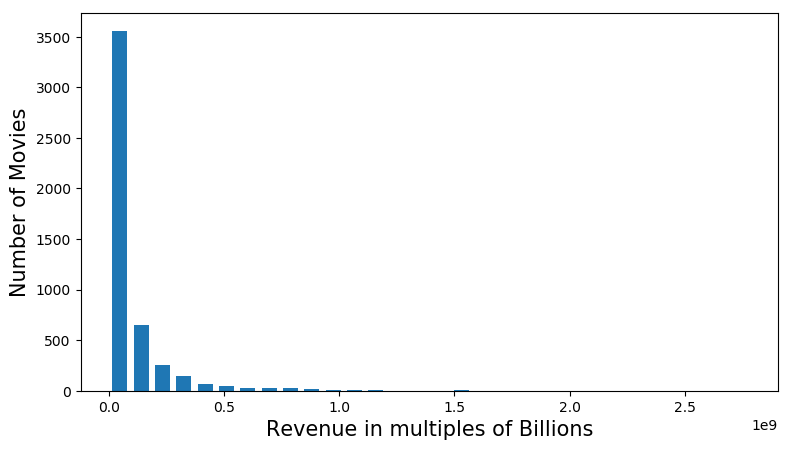

In [1531]:
plt.figure(figsize=(9,5), dpi = 100)
plt.hist(movie_df.revenue.dropna(), rwidth= 0.7, bins= 30);
plt.xlabel('Revenue in multiples of Billions', fontsize = 15)
plt.ylabel('Number of Movies', fontsize=15)
plt.show()

Most of the movies made a Revenue somewhere **between 1 Million to 500 Million**

<a id='ieda'></a>
## 4. Intermediate Exploratory Data Analysis

In this section we will be looking into a bit deeper to understand which movie performed better, which cast performed poorly and many more.

We will be looking into the trend with respect to the category where the movies made a good profit versus movies that made lesser or were in loss. In order to do that analysis, I have considered 100 Million USD as the minmum profit and have created 2 new columns that mention about the Profit and Loss the movie made

In [1532]:
profit_movie_df = movie_df.query('profit > 100000000')
loss_movie_df = movie_df.query('loss > 0')

In [1533]:
def get_profit_series(column):
    concat_str = profit_movie_df[column].str.cat(sep='|')
    series = pd.Series(concat_str.split('|'))
    return series

In [1534]:
def get_loss_series(column):
    concat_str = loss_movie_df[column].str.cat(sep='|')
    series = pd.Series(concat_str.split('|'))
    return series

In [1535]:
def get_series(column):
    concat_str = movie_df[column].str.cat(sep='|')
    series = pd.Series(concat_str.split('|'))
    return series

### Research Question 1:  Cast Frequency Trend

In [1536]:
cast_top_10 = get_series('cast').value_counts().head(10)

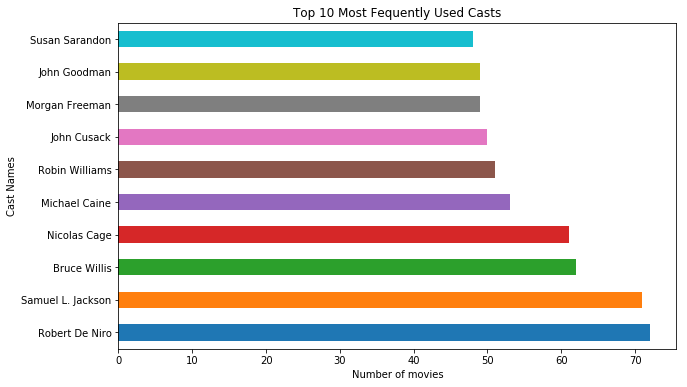

In [1537]:
plt = cast_top_10.plot.barh(fontsize=10)
plt.set(title = 'Top 10 Most Fequently Used Casts')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Cast Names');
plt.figure.set_size_inches(10, 6)

The Cast that acted the most ever with a count of almost 70 movies is **Robert De Niro**, one of the legendary Actor of all time.
**Samuel L Jackson** and **Bruce Willis** come as Second and Third respectively with 70 & 60 approx.

### Research Question 2:  Cast Frequency Trend In Profit Making Movies

In [1538]:
cast_top_10 = get_profit_series('cast').value_counts().head(10)

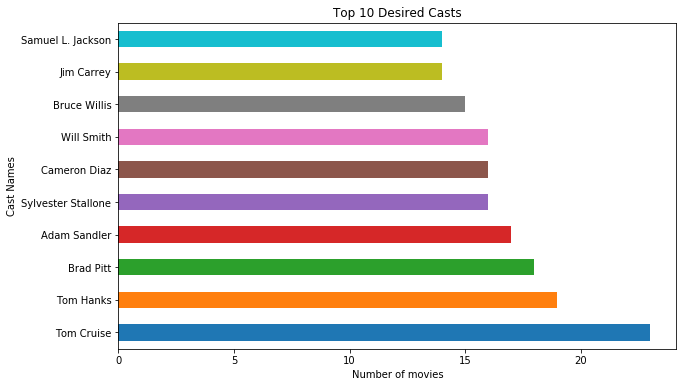

In [1539]:
plt = cast_top_10.plot.barh(fontsize=10)
plt.set(title = 'Top 10 Desired Casts')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Cast Names');
plt.figure.set_size_inches(10, 6)

**Tom Cruise**, the Actor, who always gives many Profit Making Movies, or it can be also understood this way that Directors/Producers who wish to make their movie Hit goes with 'Tom Cruise'.

Though **Robert De Niro** tops the other list, he couldn't make it up to the top 10 Profit Making Casts, though **Samuel L. Jackson** and **Bruce Willis** come as 8th and 9th.

### Research Question 3:  Cast Frequency Trend In Loss Making Movies

In [1540]:
cast_top_10 = get_loss_series('cast').value_counts().head(10)

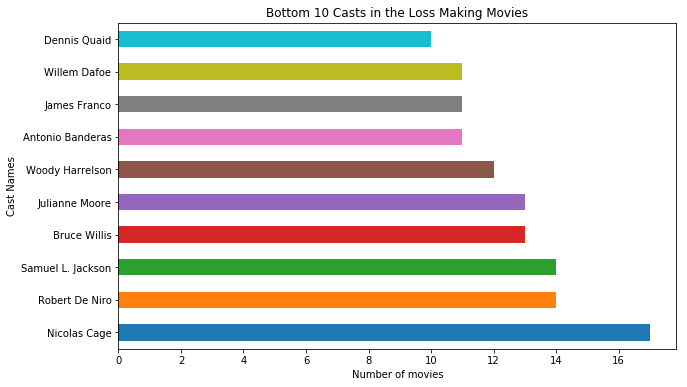

In [1541]:
plt = cast_top_10.plot.barh(fontsize=10)
plt.set(title = 'Bottom 10 Casts in the Loss Making Movies')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Cast Names');
plt.figure.set_size_inches(10, 6)

**Nicolas Cage** is the most un-fortunate Actor of all time as he made most Loss Making Movies ever.

The best part is that **Samuel L. Jackson** and **Bruce Willis** even are spotted in the worst 10 movies.

### Research Question 4:  Keyword Frequency Trend

In [1542]:
keyword_top_10 = get_series('keywords').value_counts().head(10)

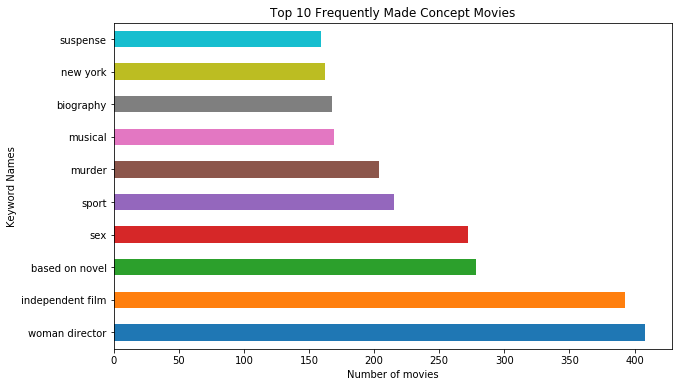

In [1543]:
plt = keyword_top_10.plot.barh(fontsize=10)
plt.set(title = 'Top 10 Frequently Made Concept Movies')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Keyword Names');
plt.figure.set_size_inches(10, 6)

Surprisingle, the Keyword 'Woman Director' has been the buzz around, and that is a good news as Women are gving equal competition to men.

Let's see which Women Director is the best among the best.

In [1544]:
def highest(df, column):
    index = df[column].idxmax
    info = pd.DataFrame(movie_df.loc[index])
    return info

In [1545]:
women_movie_df = movie_df[movie_df['keywords'].str.contains("woman director", na=False)]
highest(women_movie_df, 'profit').loc[['director', 'original_title', 'cast', 'budget', 'revenue', 'popularity']]

,23
director,Sam Taylor-Johnson
original_title,Fifty Shades of Grey
cast,Dakota Johnson|Jamie Dornan|Jennifer Ehle|Eloi...
budget,4e+07
revenue,5.69651e+08
popularity,4.7104


One of the most famous movie **Fifty Shades of Grey** was directed by **Sam Taylor-Johnson** and is found to be highest grossing movie by a Woman Director

### Research Question 5:  Keyword Frequency Trend In Profit Making Movies

In [1546]:
keyword_top_10 = get_profit_series('keywords').value_counts().head(10)

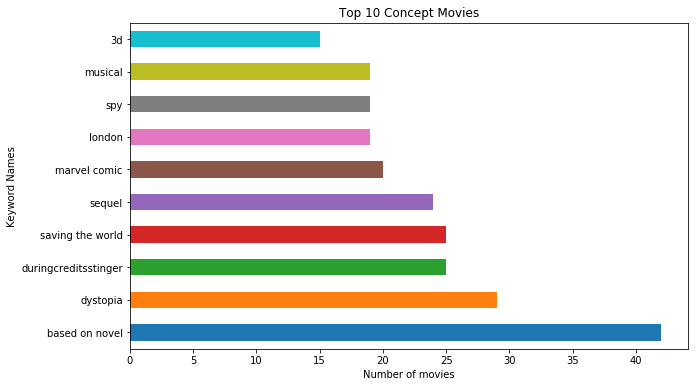

In [1547]:
plt = keyword_top_10.plot.barh(fontsize=10)
plt.set(title = 'Top 10 Concept Movies')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Keyword Names');
plt.figure.set_size_inches(10, 6)

People seems to be liking more movies **Based on Novels**, **Dystopia** and **Saving the World** kind as the have made huge profits than the others.

### Research Question 6:  Keyword Frequency Trend In Loss Making Movies

Though **Woman Director** and **Independent Film** were in the top 10 of used Keywords, they appear also in the Worst performed movie. Most of those have been performing low.

In [1548]:
keyword_top_10 = get_loss_series('keywords').value_counts().head(10)

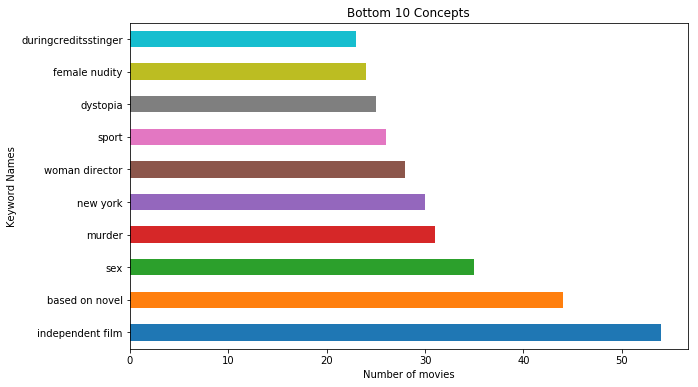

In [1549]:
plt = keyword_top_10.plot.barh(fontsize=10)
plt.set(title = 'Bottom 10 Concepts')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Keyword Names');
plt.figure.set_size_inches(10, 6)

People seems to be equally hating the movies  **Based on Novels**, **Independent Film** and **Sex** kind as they have made huge loss than the others.

### Research Question 7:  Genre Frequency Trend

In [1550]:
genre_top_10 = get_series('genres').value_counts().head(10)

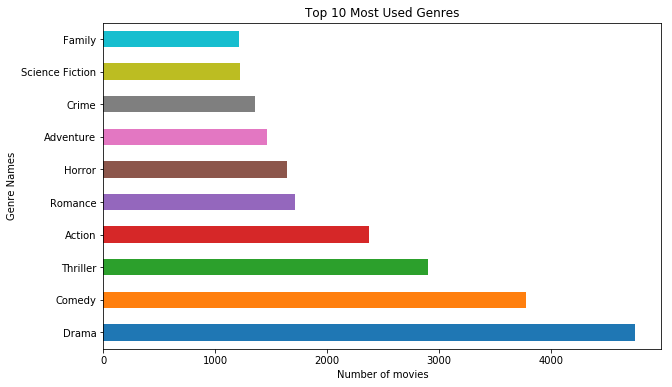

In [1551]:
plt = genre_top_10.plot.barh(fontsize=10)
plt.set(title = 'Top 10 Most Used Genres')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Genre Names');
plt.figure.set_size_inches(10, 6)

Directors have been found pouring in movies based on **Drama** Genre the most and then followed by **Comedy** and then **Thriller**. Let's understand why is that so.

### Research Question 8:  Genre Frequency Trend In Profit Making Movies
The Genre that won many hearts was **Action** with the likes of **Tom Cruise**

In [1552]:
genre_top_10 = get_profit_series('genres').value_counts().head(10)

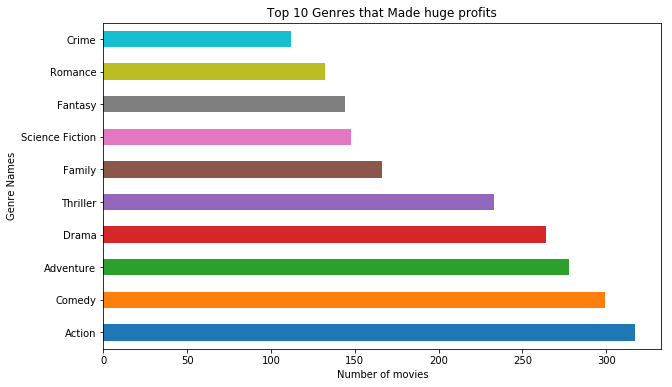

In [1553]:
plt = genre_top_10.plot.barh(fontsize=10)
plt.set(title = 'Top 10 Genres that Made huge profits')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Genre Names');
plt.figure.set_size_inches(10, 6)

The above plot makes it so clear that the Audience have been liking **Action**, **Comedy**, **Adventure** & **Drama** a lot and that is the reason Directors have been pouring the market with so many such movies

### Research Question 9:  Genre Frequency Trend In Loss Making Movies

In [1554]:
genre_top_10 = get_loss_series('genres').value_counts().head(10)

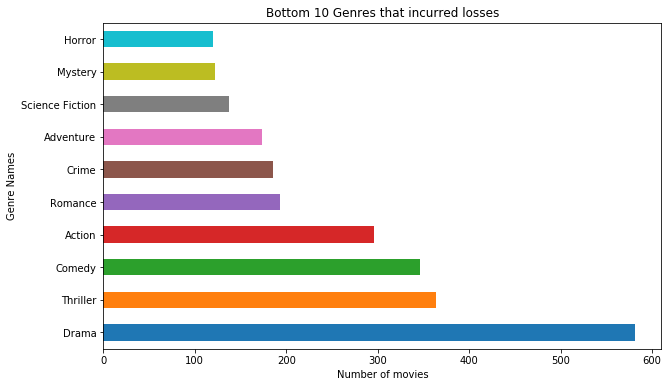

In [1555]:
plt = genre_top_10.plot.barh(fontsize=10)
plt.set(title = 'Bottom 10 Genres that incurred losses')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Genre Names');
plt.figure.set_size_inches(10, 6)

Though **Drama** was the reigning champion in Profit Making movies, many of the Directors who thought that the movie would be good actually failed greatly too.

**Let's run an analysis by filtering the movies that made Loss and were of the Drama Genre and understand which Cast acted in the movie most.**

In [1556]:
df_loss = movie_df.query('loss > 0')
df_loss_drama = df_loss[df_loss['genres'].str.contains("Drama", na=False)]

In [1557]:
concat_str = df_loss_drama['cast'].str.cat(sep='|')
series = pd.Series(concat_str.split('|'))

cast_top_10 = series.value_counts().head(10)

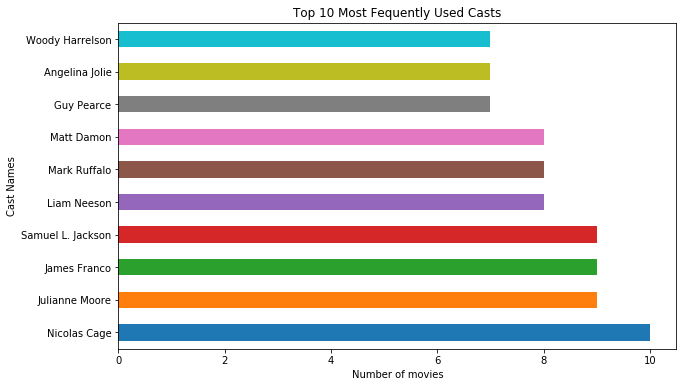

In [1558]:
plt = cast_top_10.plot.barh(fontsize=10)
plt.set(title = 'Top 10 Most Fequently Used Casts')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Cast Names');
plt.figure.set_size_inches(10, 6)

Ah Huh ! **Nicolas Cage**, the unfortunate Actor, is the most reason behind the Flop of **Drama** Genre

<a id='aeda'></a>
## 5. Advanced Exploratory Data Analysis
In this section, we will looking a bit deeper than previous by grouping the dataset based on **Release Year** and analyzing how the movies get grouped

In [1559]:
def divide_into_segment(column, bin_names):
    series = movie_df[column].describe()
    #bin_edges = [int(series['min']), int(series['25%']), int(series['50%']), int(series['75%']), int(series['max'])]
    bin_edges = [1960, 1970, 1980, 1990, 2000, 2015]
    movie_df['{}_levels'.format(column)] = pd.cut(movie_df[column], bin_edges, labels=bin_names, include_lowest = True)

In [1560]:
def get_series(df, column):
    concat_str = df[column].str.cat(sep='|')
    series = pd.Series(concat_str.split('|'))
    return series

In [1561]:
def get_profit_series(df, column):
    concat_str = df[column].str.cat(sep='|')
    series = pd.Series(concat_str.split('|'))
    return series

In [1562]:
def get_loss_series(df, column):
    concat_str = df[column].str.cat(sep='|')
    series = pd.Series(concat_str.split('|'))
    return series

### Research Question 1:  Popularism of Casts in 4 quarters of years

In [1563]:
bin_names = ['Very Early', 'Early', 'Moderately Recent', 'Recent', 'Latest']
divide_into_segment('release_year', bin_names)

In [1564]:
groupby_release_year = movie_df.groupby(['release_year_levels'])

groupby_release_year_very_early   = groupby_release_year.get_group('Very Early')
groupby_release_year_early        = groupby_release_year.get_group('Early')
groupby_release_moderately_recent = groupby_release_year.get_group('Moderately Recent')
groupby_release_year_recent       = groupby_release_year.get_group('Recent')
groupby_release_year_latest       = groupby_release_year.get_group('Latest')

In [1565]:
cast_top_10_very_early        = get_series(groupby_release_year_very_early, 'cast').value_counts().head(10)
cast_top_10_early             = get_series(groupby_release_year_early, 'cast').value_counts().head(10)
cast_top_10_moderately_recent = get_series(groupby_release_moderately_recent, 'cast').value_counts().head(10)
cast_top_10_recent            = get_series(groupby_release_year_recent, 'cast').value_counts().head(10)
cast_top_10_latest            = get_series(groupby_release_year_latest, 'cast').value_counts().head(10)

In [1566]:
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit,loss
count,10731.000000,10731.000000,5.153000e+03,4.843000e+03,10703.000000,10731.000000,10731.000000,10731.000000,3.849000e+03,3.849000e+03
mean,65201.741869,0.652615,3.082824e+07,8.933981e+07,102.736896,219.812972,5.964710,2001.259622,7.056595e+07,-7.056595e+07
std,91470.508056,1.004804,3.893199e+07,1.621546e+08,30.079331,578.815324,0.930283,12.820151,1.506990e+08,1.506990e+08
min,5.000000,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000,-4.139124e+08,-2.544506e+09
25%,10547.500000,0.210765,6.000000e+06,7.779664e+06,90.000000,17.000000,5.400000,1995.000000,-1.312284e+06,-8.198066e+07
50%,20323.000000,0.387081,1.750000e+07,3.191160e+07,99.000000,39.000000,6.000000,2006.000000,2.014450e+07,-2.014450e+07
75%,73948.500000,0.720889,4.000000e+07,1.000000e+08,112.000000,148.000000,6.600000,2011.000000,8.198066e+07,1.312284e+06
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,2.544506e+09,4.139124e+08


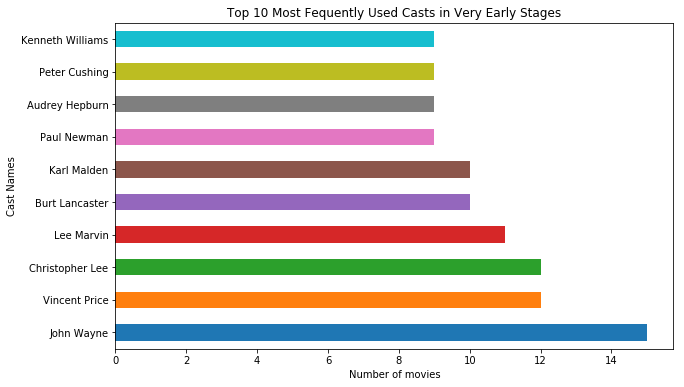

In [1567]:
plt = cast_top_10_very_early.plot.barh(fontsize=10)

plt.set(title = 'Top 10 Most Fequently Used Casts in Very Early Stages')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Cast Names');
plt.figure.set_size_inches(10, 6)

In the **Very Early** stages, from 1960 to 1970, **John Wayne** Casted the most with 13 movies.

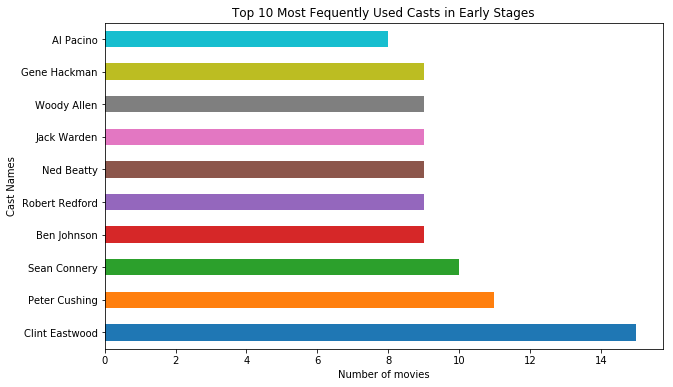

In [1568]:
plt = cast_top_10_early.plot.barh(fontsize=10)
plt.set(title = 'Top 10 Most Fequently Used Casts in Early Stages')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Cast Names');
plt.figure.set_size_inches(10, 6)

In the **Early** stages, from 1971 to 1980, **Clint Eastwood** Casted the most with 15 movies approx with John Wayne dis-appearing from the list

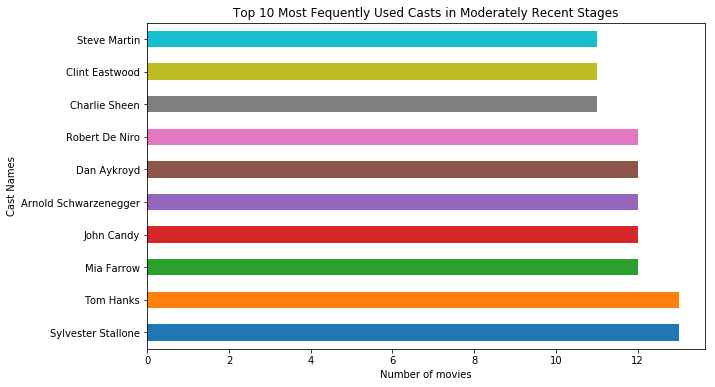

In [1569]:
plt = cast_top_10_moderately_recent.plot.barh(fontsize=10)
plt.set(title = 'Top 10 Most Fequently Used Casts in Moderately Recent Stages')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Cast Names');
plt.figure.set_size_inches(10, 6)

In the **Moderately Recent** stages, **Sylvester Stallone** & **Tom Hanks** casted the most with 13 movies, and **Clint Eastwood** moving to the 9th position

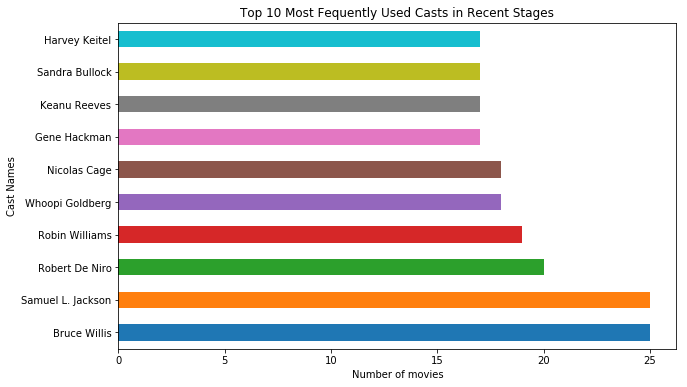

In [1570]:
plt = cast_top_10_recent.plot.barh(fontsize=10)
plt.set(title = 'Top 10 Most Fequently Used Casts in Recent Stages')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Cast Names');
plt.figure.set_size_inches(10, 6)

In the **Recent** stages, **Bruce Willis** & **Samuel L. Jackson** casted the most with 25 movies and other toppers from the previous list just got dis-appeared

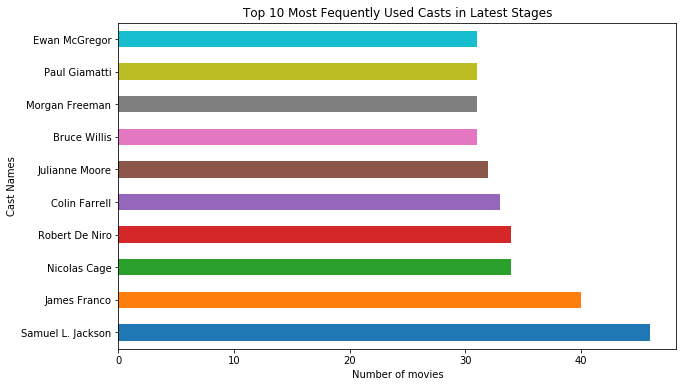

In [1571]:
plt = cast_top_10_latest.plot.barh(fontsize=10)
plt.set(title = 'Top 10 Most Fequently Used Casts in Latest Stages')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Cast Names');
plt.figure.set_size_inches(10, 6)

In the **Latest** stages, **Samuel L. Jackson** casted the most with 45 movies and **Bruce Willis** went down to 7th position.

### Research Question 2:  Popularism of Casts in 4 quarters of years but in Profitable Movies

In [1572]:
profit_movie_df = movie_df.query('profit > 100000000')

In [1573]:
groupby_release_year = profit_movie_df.groupby(['release_year_levels'])

groupby_release_year_very_early   = groupby_release_year.get_group('Very Early')
groupby_release_year_early        = groupby_release_year.get_group('Early')
groupby_release_moderately_recent = groupby_release_year.get_group('Moderately Recent')
groupby_release_year_recent       = groupby_release_year.get_group('Recent')
groupby_release_year_latest       = groupby_release_year.get_group('Latest')

In [1574]:
cast_top_10_very_early        = get_profit_series(groupby_release_year_very_early, 'cast').value_counts().head(10)
cast_top_10_early             = get_profit_series(groupby_release_year_early, 'cast').value_counts().head(10)
cast_top_10_moderately_recent = get_profit_series(groupby_release_moderately_recent, 'cast').value_counts().head(10)
cast_top_10_recent            = get_profit_series(groupby_release_year_recent, 'cast').value_counts().head(10)
cast_top_10_latest            = get_profit_series(groupby_release_year_latest, 'cast').value_counts().head(10)

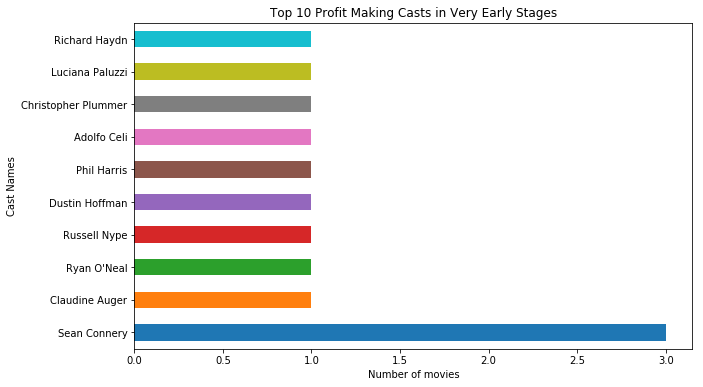

In [1575]:
plt = cast_top_10_very_early.plot.barh(fontsize=10)

plt.set(title = 'Top 10 Profit Making Casts in Very Early Stages')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Cast Names');
plt.figure.set_size_inches(10, 6)

In the **Very Early**, stages **Sean Connery** Casted for the most Profitable movies with the count being 3.

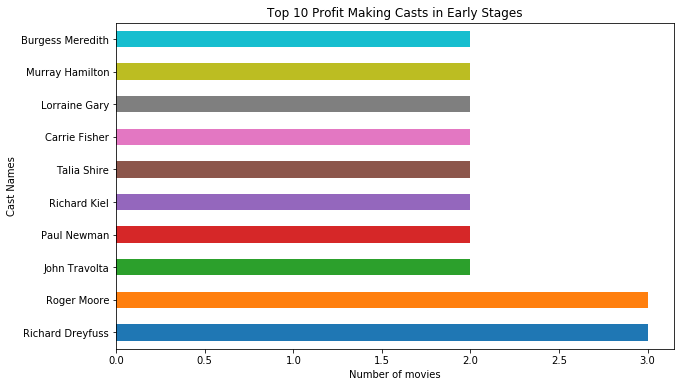

In [1576]:
plt = cast_top_10_early.plot.barh(fontsize=10)
plt.set(title = 'Top 10 Profit Making Casts in Early Stages')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Cast Names');
plt.figure.set_size_inches(10, 6)

In the **Early** stages, **Richard Dreyfuss** Casted for the most Profitable movies with the count being 3. The Trump Card for the season

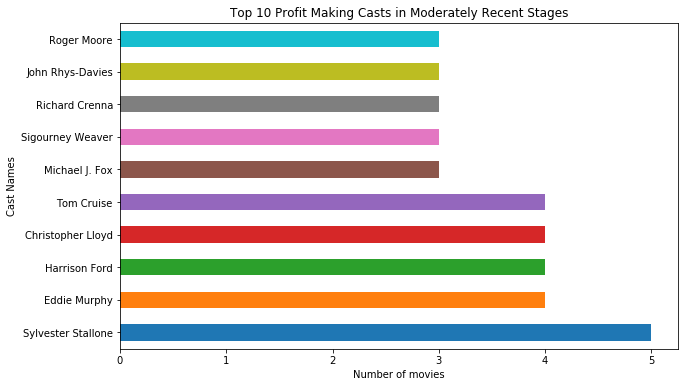

In [1577]:
plt = cast_top_10_moderately_recent.plot.barh(fontsize=10)
plt.set(title = 'Top 10 Profit Making Casts in Moderately Recent Stages')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Cast Names');
plt.figure.set_size_inches(10, 6)

In the **Moderately Recent** stages, **Sylvester Stallone** casted for the most Profitable movies with the count being 5.

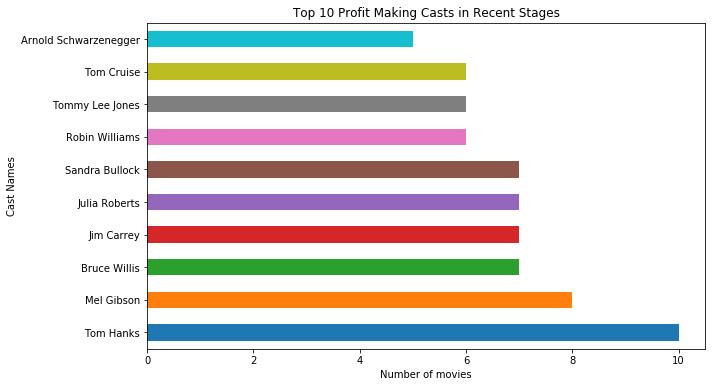

In [1578]:
plt = cast_top_10_recent.plot.barh(fontsize=10)
plt.set(title = 'Top 10 Profit Making Casts in Recent Stages')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Cast Names');
plt.figure.set_size_inches(10, 6)

In the **Recent** stages, **Tom Hanks** casted for the most Profitable movies with the count being 10.

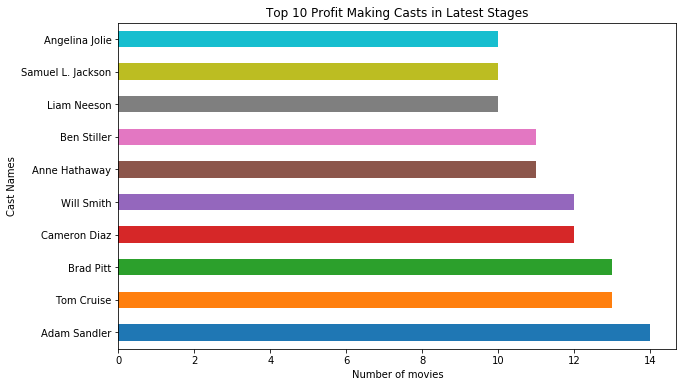

In [1579]:
plt = cast_top_10_latest.plot.barh(fontsize=10)
plt.set(title = 'Top 10 Profit Making Casts in Latest Stages')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Cast Names');
plt.figure.set_size_inches(10, 6)

In the **Latest** stages, **Adam Sandler** casted for the most Profitable movies with the count being 14. And special mention on **Tom Cruise** & **Brad Pitt** with 13 each

### Research Question 3:  Distribution of Casts in 4 quarters of years but in Loss making Movies

In [1580]:
loss_movie_df = movie_df.query('loss > 0')

In [1581]:
groupby_release_year = loss_movie_df.groupby(['release_year_levels'])

groupby_release_year_very_early   = groupby_release_year.get_group('Very Early')
groupby_release_year_early        = groupby_release_year.get_group('Early')
groupby_release_moderately_recent = groupby_release_year.get_group('Moderately Recent')
groupby_release_year_recent       = groupby_release_year.get_group('Recent')
groupby_release_year_latest       = groupby_release_year.get_group('Latest')

In [1582]:
cast_top_10_very_early        = get_loss_series(groupby_release_year_very_early, 'cast').value_counts().head(10)
cast_top_10_early             = get_loss_series(groupby_release_year_early, 'cast').value_counts().head(10)
cast_top_10_moderately_recent = get_loss_series(groupby_release_moderately_recent, 'cast').value_counts().head(10)
cast_top_10_recent            = get_loss_series(groupby_release_year_recent, 'cast').value_counts().head(10)
cast_top_10_latest            = get_loss_series(groupby_release_year_latest, 'cast').value_counts().head(10)

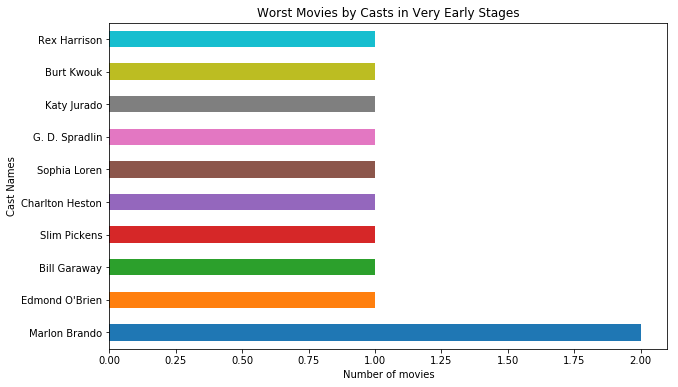

In [1583]:
plt = cast_top_10_very_early.plot.barh(fontsize=10)

plt.set(title = 'Worst Movies by Casts in Very Early Stages')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Cast Names');
plt.figure.set_size_inches(10, 6)

In the **Very Early** Stages, **Marion Brando** gave many flop movies

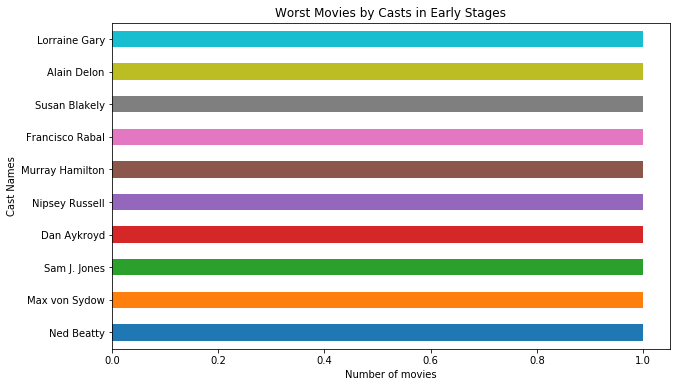

In [1584]:
plt = cast_top_10_early.plot.barh(fontsize=10)
plt.set(title = 'Worst Movies by Casts in Early Stages')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Cast Names');
plt.figure.set_size_inches(10, 6)

In the **Early** Stages, **Ned Beatty** gave many flop movies

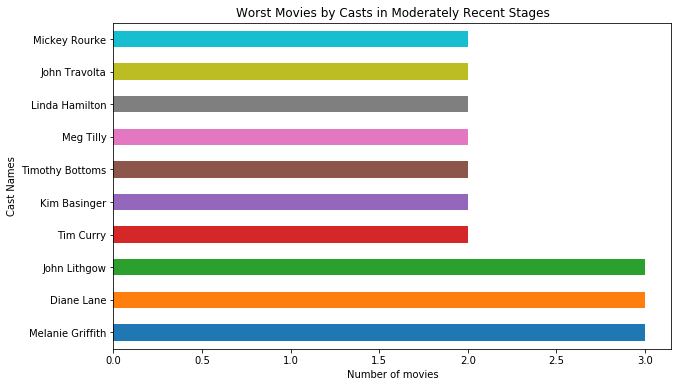

In [1585]:
plt = cast_top_10_moderately_recent.plot.barh(fontsize=10)
plt.set(title = 'Worst Movies by Casts in Moderately Recent Stages')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Cast Names');
plt.figure.set_size_inches(10, 6)

In the **Moderately Recent** Stages, **Melanie Griffith** gave many flop movies

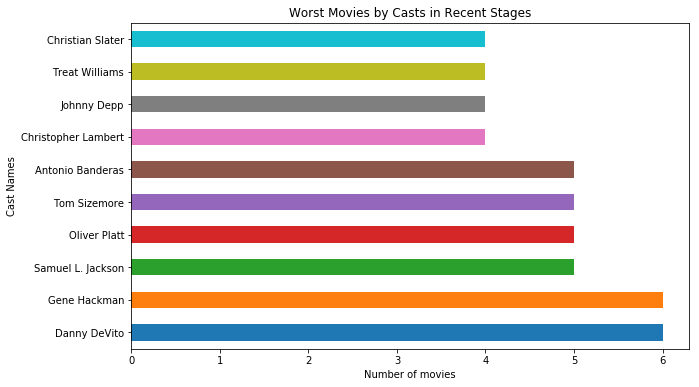

In [1586]:
plt = cast_top_10_recent.plot.barh(fontsize=10)
plt.set(title = 'Worst Movies by Casts in Recent Stages')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Cast Names');
plt.figure.set_size_inches(10, 6)

In the **Recent** Stages, **Danny DeVitto** gave many flop movies

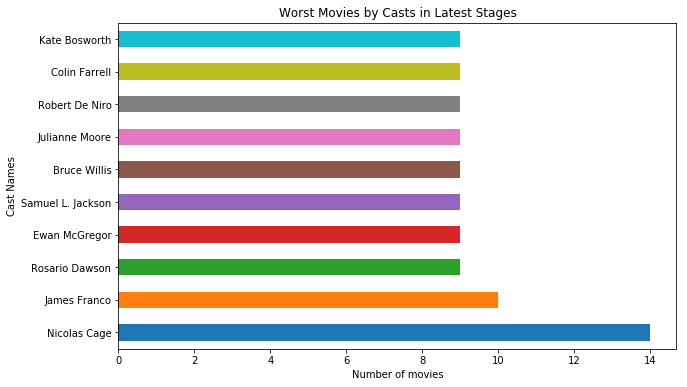

In [1587]:
plt = cast_top_10_latest.plot.barh(fontsize=10)
plt.set(title = 'Worst Movies by Casts in Latest Stages')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Cast Names');
plt.figure.set_size_inches(10, 6)

In the **Latest** Stages, **Nicolas Cage** gave many flop movies

### Research Question 4:  Distribution of Genre in 4 quarters of years

In [1588]:
groupby_release_year = movie_df.groupby(['release_year_levels'])

groupby_release_year_very_early   = groupby_release_year.get_group('Very Early')
groupby_release_year_early        = groupby_release_year.get_group('Early')
groupby_release_moderately_recent = groupby_release_year.get_group('Moderately Recent')
groupby_release_year_recent       = groupby_release_year.get_group('Recent')
groupby_release_year_latest       = groupby_release_year.get_group('Latest')

In [1589]:
top_10_very_early        = get_series(groupby_release_year_very_early, 'genres').value_counts().head(10)
top_10_early             = get_series(groupby_release_year_early, 'genres').value_counts().head(10)
top_10_moderately_recent = get_series(groupby_release_moderately_recent, 'genres').value_counts().head(10)
top_10_recent            = get_series(groupby_release_year_recent, 'genres').value_counts().head(10)
top_10_latest            = get_series(groupby_release_year_latest, 'genres').value_counts().head(10)

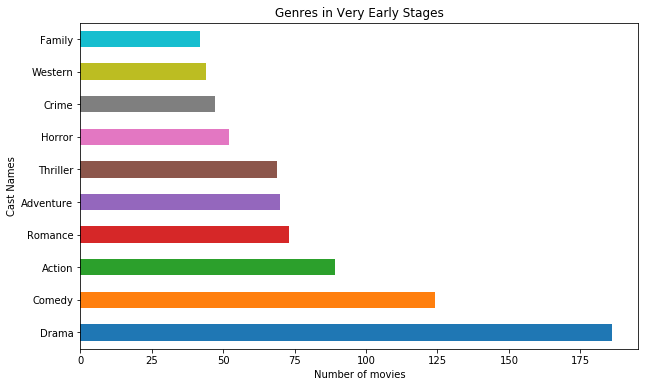

In [1590]:
plt = top_10_very_early.plot.barh(fontsize=10)

plt.set(title = 'Genres in Very Early Stages')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Cast Names');
plt.figure.set_size_inches(10, 6)

Ever since **Drama** has been the love for many audience, as the Directors made **175 movies** during the  Very Early Stages

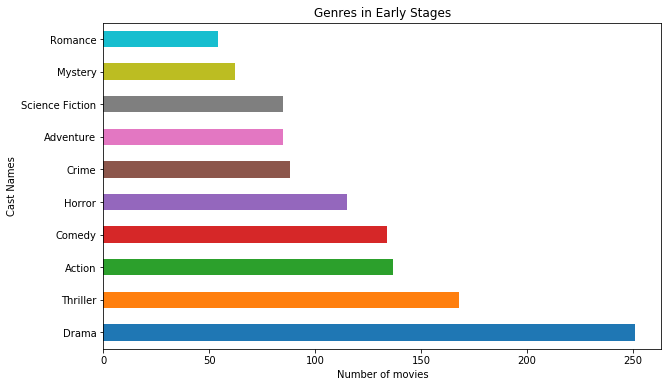

In [1591]:
plt = top_10_early.plot.barh(fontsize=10)
plt.set(title = 'Genres in Early Stages')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Cast Names');
plt.figure.set_size_inches(10, 6)

The same liking has gone so beyond that Directors started making movies based on **Drama** genre more and more that it went upto **250** for the **Early** stages

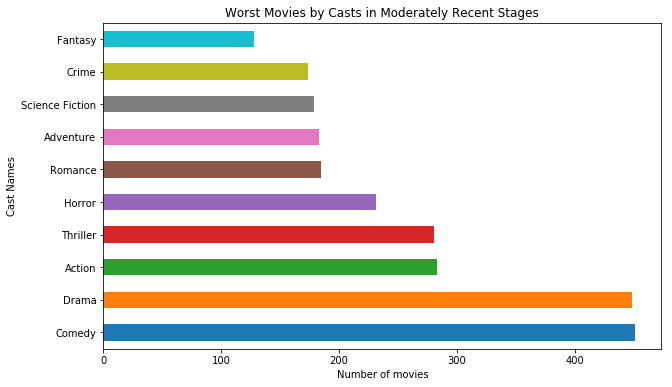

In [1592]:
plt = top_10_moderately_recent.plot.barh(fontsize=10)
plt.set(title = 'Worst Movies by Casts in Moderately Recent Stages')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Cast Names');
plt.figure.set_size_inches(10, 6)

The Directors and the Audience became crazy that **Drama** based movies went upto 450, but the nicest thing was that **Comedy** defeated the reigning champion and equalled the count

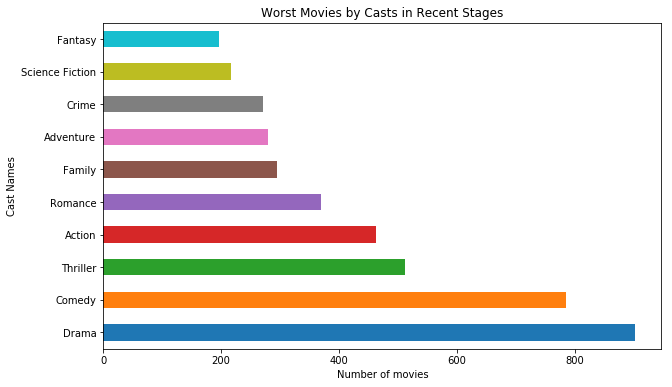

In [1593]:
plt = top_10_recent.plot.barh(fontsize=10)
plt.set(title = 'Worst Movies by Casts in Recent Stages')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Cast Names');
plt.figure.set_size_inches(10, 6)

And as usual **Drama** went off the limit and touched **900** mark.
Special mention to **Comedy**, **Thriller** and **Action** as they were produced equally

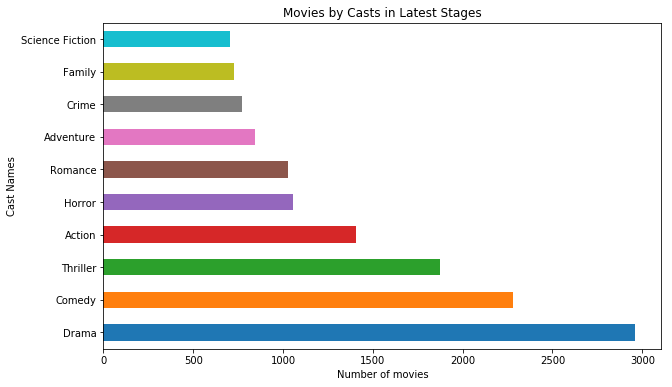

In [1594]:
plt = top_10_latest.plot.barh(fontsize=10)
plt.set(title = 'Movies by Casts in Latest Stages')
plt.set_xlabel('Number of movies')
plt.set_ylabel('Cast Names');
plt.figure.set_size_inches(10, 6)

And **Drama** went off the limit once again and breached to close to **3000** movies
Special mention to **Comedy**, **Thriller** and **Action** as they were produced equally

### Research Question 5:  Genre Trend over the Years
In this section let's understand how the Genres have been in the market over a recent years

In [1595]:
def find_trend(main_df, groupby_columns, trend_column):
    #print(main_df.info())
    # Group By Column
    groups = main_df.groupby(groupby_columns)
    #print(groups.count())
    
    # Create a dummy dataframe
    merge_df = pd.DataFrame(columns=[trend_column, 'count'])
    
    # Traverse through the groups and combine them into dataframe
    for name, group in groups:
        df = get_series(groups.get_group(name), trend_column).value_counts().reset_index()
        new_count_name = '{}_count'.format(name)
        df.rename(columns={'index':trend_column, 0:new_count_name}, inplace=True)
        #print (df.head())
        merge_df = merge_df.merge(df, left_on=trend_column, right_on=trend_column, how='outer')
    
    # Drop the dummy column
    merge_df.drop(columns=['count'], inplace=True)
    
    # Change the index to the trending column
    merge_df.set_index(trend_column, inplace=True)
    merge_df.sort_index(inplace=True, ascending=False)
    return merge_df

The making of movies with the following Genre by the Directors/Producers have increased over the past years:
<ol>
    <li>Action</li>
    <li>Documentary</li>
    <li>Drama</li>
    <li>Horror</li>
    <li>Science Fiction</li>
    <li>Thriller</li>
</ol>

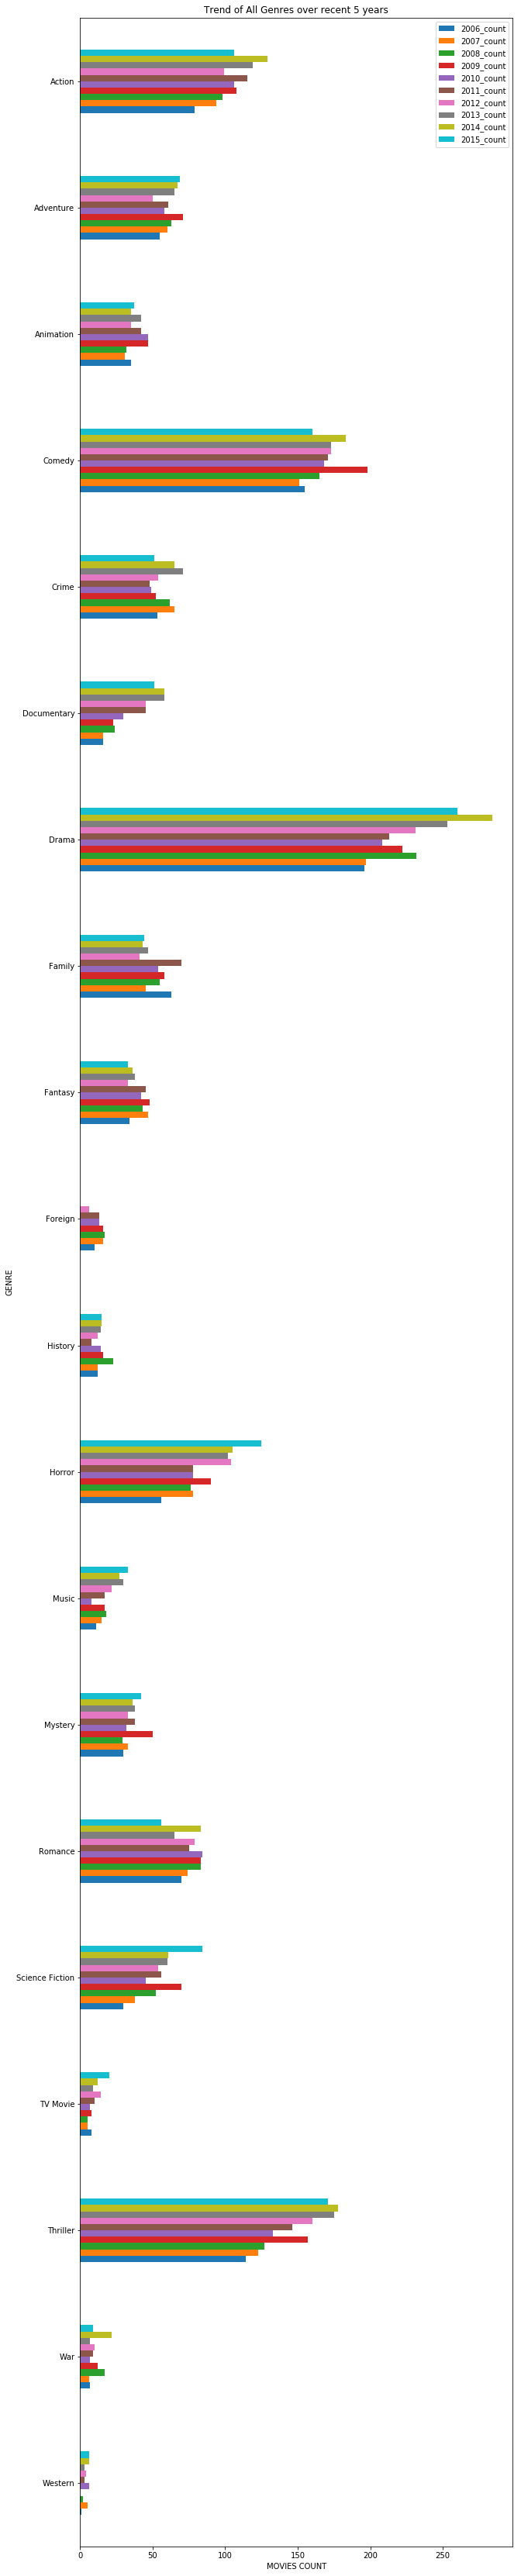

In [1596]:
new_df = find_trend(movie_df, 'release_year', 'genres')
new_df = new_df.iloc[:, -10:]
plt = new_df.plot(kind='barh', figsize=[10, 60], title='Trend of All Genres over recent 5 years', fontsize=10);
plt.set_xlabel("MOVIES COUNT");
plt.set_ylabel("GENRE");

The above plot is a distribution of Genres across 10 years and how they have grown or went down. THe plot looks interesting though

### Research Question 6:  Genre Trend over the Years of Profitable movies
In this section let's understand how the Genres have been in the market over a recent years.

The making of movies with the following Genre by the Directors/Producers have provided them good profits over the years
<ol>
    <li>Action</li>
    <li>Adventure</li>
    <li>Comedy</li>
    <li>Science Fiction</li>
</ol>

The following genres are not getting more profits:
<ol>
    <li>Family</li>
    <li>Romance</li>
</ol>

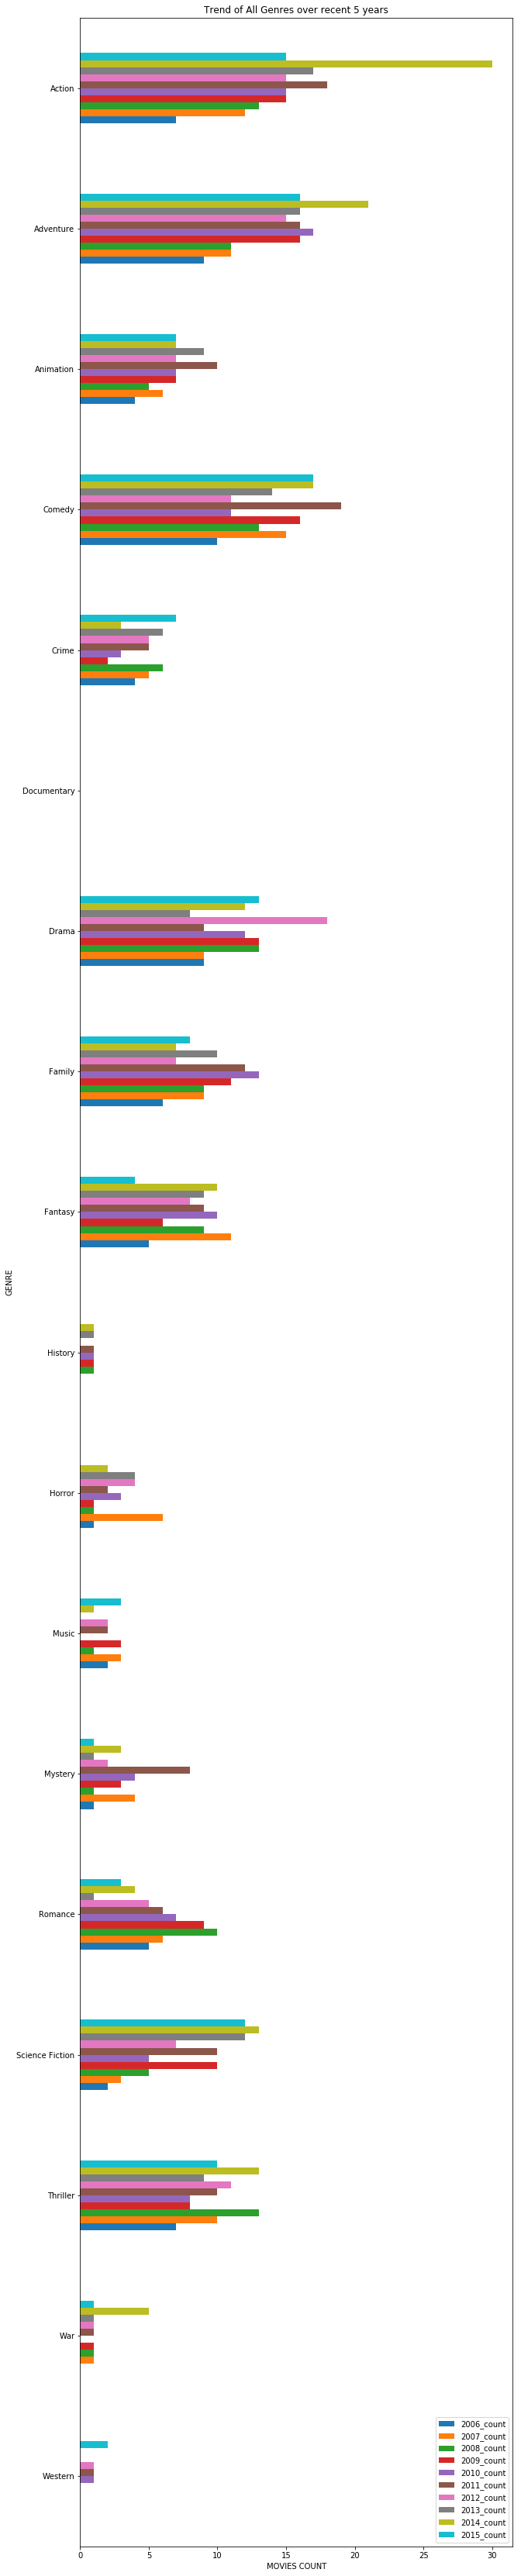

In [1597]:
df = find_trend(movie_df.query('profit > 100000000'), 'release_year', 'genres')
df = df.iloc[:, -10:]
plt = df.plot(kind='barh', figsize=[10, 60], title='Trend of All Genres over recent 5 years', fontsize=10);
plt.set_xlabel("MOVIES COUNT");
plt.set_ylabel("GENRE");

This plot explains about the trend of the Genres over the period of 10 years but only considering the movies that made a profit above 100 M USD.
Interestingly **Documentary** could not even make 1 profitable movie

<a id='conclusion'></a>
## 6. Conclusion

This data set was really interesting, bringout crazy analysis, one such was with **Drama** Genre and **Nicolas Cage**.

Following are the conclusions:
<ol>
    <li>Adam Sandler, Tom Cruise, Tom Hanks & Bradd Pitt are the best actors as Director should go with as they always give good profit</li>
    <li>The Directors should be very cautious while roping in Nicolas Cage, Robert De Niro, Samuel L. Jackson as the movies where in they have performed have been not making much profit</li>
    <li>The Audience seems to be liking movies that are Based on Novels, Dystopia and "Saving the World" kind, the Directors can use this information to make future movies accordingly.</li>
    <li>The Audience also liked watching Drama, Action, Thriller & Comedy movies more, but Drama was always the reigning champion</li>
    <li>The Audience did not like the Documentary movies so the Directors should look into the case</li>
    <li>Though Drama was made in huge quantity it was the top in Loss Making Movies, crazy stuff</li>
    <li>On an average a Profit Making Movie had a Running time between 100 and 130 minutes</li>
</ol>

#### Limitations:
The dataset considered a profit of more than 100 Million USD, and entire analysis was based on that. The value of 100 Million USD was considered from a survey which quoted 130 Million USD to be the average grossing of each movie.
Also the dataset had numerous NaN and 0 values which were removed, also since these values could not be considered in the analysis they did not make into any of the analysis.